# Generating Figure 2

In [1]:
%load_ext autoreload
%autoreload 2
from figure2_functions import *
from tqdm.notebook import tqdm
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import SymLogNorm

### Running simulations

Simulating scenarios for different strength values $\alpha=\frac{1}{19}, 1, 3, 9$ (corresponds to buyers with average values of : $\frac{1}{20}, \frac{1}{2}, \frac{3}{4},  \frac{9}{10}$) using backwards shooting.

In [2]:
res_ = {}
alpha_ = [1/19,1,3,9]
n_ = np.arange(3,16)

In [ ]:
for alpha in tqdm(alpha_) :
    res_[alpha] = np.ones((len(n_),n_[-1]-2))*np.nan
    for n in tqdm(n_) :
        for ks in np.arange(2,n) :
            res_[alpha][n-3][ks-2] = scenarioGU_1(ks,n-ks,alpha,eps=10**-8)['coal_ind']-scenarioGU_2(ks,n-ks,alpha,eps=10**-8)['strong_ind']

## Plots

In [49]:
text1_ = ["(weak members)","(symmetric case)","(strong members)","(very strong members)"]
text2_ = [r"$\gamma=1/19$",r"$\gamma=1$",r"$\gamma=3$",r"$\gamma=9$"]

xtick_labels = np.where(np.arange(len(n_))%2==0,n_,"")
xtick_labels = np.append(xtick_labels,[" "])
xtick_labels = np.tile(xtick_labels,4)[:-1]

ytick_labels = np.where(np.arange(len(n_))%2==0,np.flip(n_-1),"")

emax = -1.0
emin = -7

cbar_ticks = np.append(-np.flip(np.power(10,np.arange(emin,emax+1))),np.zeros(1))
cbar_ticks = np.append(cbar_ticks,np.power(10,np.arange(emin,emax+1)))

cbar_ticks_labels = [r"$-10^{{{:d}}}$".format(i) for i in np.flip(range(emin,int(emax)+1))]+["0"]+[r"$10^{{{:d}}}$".format(i) for i in range(emin,int(emax)+1)]
cbar_ticks_labels = np.where(np.arange(len(cbar_ticks))%2==0,cbar_ticks_labels,r'')

In [5]:
displayed_array = np.zeros((13,13*4+3))
displayed_array *= np.nan
for i in range(4) :
    displayed_array[:,13*i+i:13*(i+1)+i] = np.flip(np.transpose(res_[alpha_[i]]),axis=0)

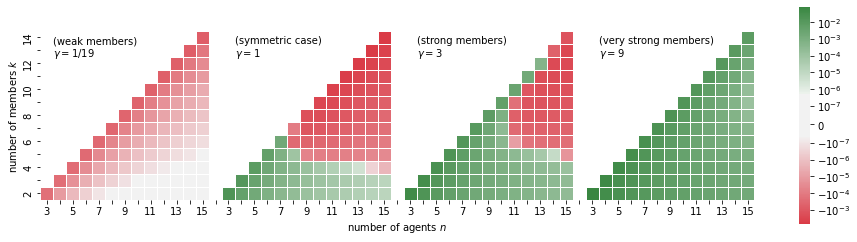

In [50]:
plt.figure(figsize=(16,5*0.8))
sns.heatmap(displayed_array,
            xticklabels=xtick_labels,yticklabels=ytick_labels,
            vmin = -10**emax,
            vmax= 10**emax,
            mask=np.isnan(displayed_array),center=0,
            norm=SymLogNorm(linthresh=10**emin),
            cbar = True,
            #cbar_ax= None if i!=1 else cbar_ax,
            cbar_kws={"ticks": cbar_ticks},
            cmap=sns.diverging_palette(10,130,sep=50,n=16,as_cmap=True),#,s=85,l=53,sep=50,as_cmap=False,n=16),
            square=True,linewidths=.5)
for i in range(len(text1_)) :
    plt.text(1+i*14,1,text1_[i])
    plt.text(1+i*14,2,text2_[i])

plt.xlabel(r"number of agents $n$")
plt.ylabel(r"number of members $k$")
plt.savefig("images/defection_loss_sym.png".format(emin,emax),dpi=300)
plt.show()